In [39]:
%%html
<script>
    // AUTORUN ALL CELLS ON NOTEBOOK-LOAD!
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            $(jupyter.events).on("kernel_ready.Kernel", function () {
                console.log("Auto-running all cells-below...");
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
            });
        }
    );
</script>

In [40]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [41]:
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [42]:
banknote_data = pd.read_csv("../Datasets/banknote.csv",sep=',')

In [43]:
banknote_data.head()

,variance,skewness,kurtosis,entropy,authentic
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [44]:
banknote_data= banknote_data.round()

In [45]:
banknote_data.head()

,variance,skewness,kurtosis,entropy,authentic
0,4.0,9.0,-3.0,-0.0,0
1,5.0,8.0,-2.0,-1.0,0
2,4.0,-3.0,2.0,0.0,0
3,3.0,10.0,-4.0,-4.0,0
4,0.0,-4.0,5.0,-1.0,0


In [46]:
X = banknote_data.values[:,0:4]
Y = banknote_data.values[:,4]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 100)

In [47]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(3),max_iter=1000)
mlp.fit(X_train,Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=3, learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [48]:
predictions = mlp.predict(X_test)

In [49]:
print('Confusion Matrix:\n\n',confusion_matrix(Y_test,predictions))
print("\n")
print('Classification Report:\n\n',classification_report(Y_test,predictions,target_names=['0','1']))

Confusion Matrix:

 [[160   3]
 [  0 112]]


Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.98      0.99       163
           1       0.97      1.00      0.99       112

   micro avg       0.99      0.99      0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [50]:
#print(mlp.predict_proba(X_test)) (Uncomment this to view huge list of probabilities of each class for X_test)

In [51]:
pkmn = pd.read_csv("../Datasets/Pokemon.csv")
pkmn.loc[pkmn['Legendary']==False,'Legendary']=0
pkmn.loc[pkmn['Legendary']==True,'Legendary']=1
pkmn = pkmn.drop(['#','Name','Type 1','Type 2','Generation'],axis=1)
pkmn.isnull().sum()
pkmn

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,318,45,49,49,65,65,45,0
1,405,60,62,63,80,80,60,0
2,525,80,82,83,100,100,80,0
3,625,80,100,123,122,120,80,0
4,309,39,52,43,60,50,65,0
5,405,58,64,58,80,65,80,0
6,534,78,84,78,109,85,100,0
7,634,78,130,111,130,85,100,0
8,634,78,104,78,159,115,100,0
9,314,44,48,65,50,64,43,0


In [52]:
import seaborn as sb
%config InlineBackend.figure_format = 'svg'
#s = sb.pairplot(pkmn, hue="Legendary",height = 3,vars=["HP","Attack","Defense","Sp. Atk", "Sp. Def"],palette="husl")

In [53]:
heat = sb.heatmap(pkmn.corr(),annot=True, fmt='.2f')

Class 0: 735
Class 1: 65
Proportion: 11.31 : 1


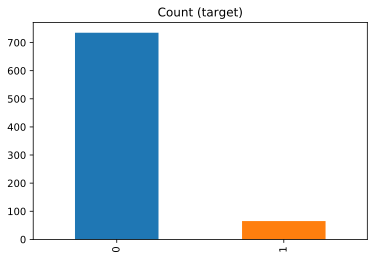

In [54]:
target_count = pkmn['Legendary'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (target)');
#Clearly output shows that dataset is hugely unbalanced and has to be equalized for both 0 and 1 classes to train our model.

In [76]:
y = pkmn['Legendary'].values
X = pkmn.values[:,:-1]

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [57]:
#Function to plot 2 D points
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

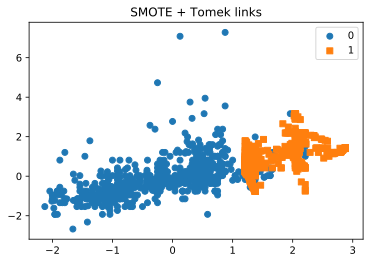

Counter({0: 735, 1: 735})

In [58]:
#Over and Undersampling data points using SMOTE and Tomek Links
from imblearn.combine import SMOTETomek
from sklearn.decomposition import PCA
smt = SMOTETomek(ratio='auto')
X_smt, Y_smt = smt.fit_sample(X_std, y)
plot_2d_space(X_smt, Y_smt, 'SMOTE + Tomek links')
collections.Counter(Y_smt)

In [84]:
pkmn_mod = pd.DataFrame({'Total':X_smt[:,0], 'HP':X_smt[:,1], 'Attack':X_smt[:,2], 'Defense':X_smt[:,3], 'Sp. Atk':X_smt[:,4], 'Sp. Def':X_smt[:,5], 'Speed':X_smt[:,6], 'Legendary':Y_smt[:,]})

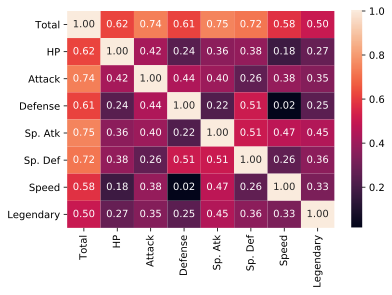

In [87]:
heat = sb.heatmap(pkmn.corr(),annot=True, fmt='.2f')

AttributeError: module 'seaborn' has no attribute 'plt'

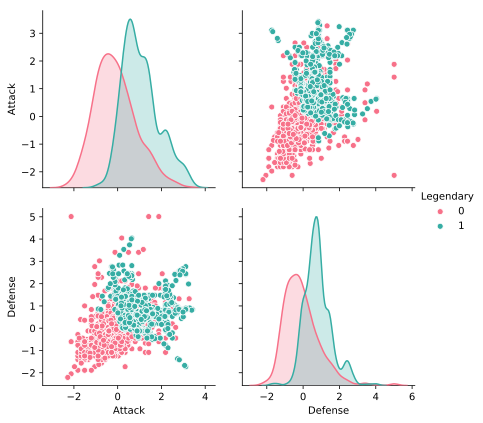

In [89]:
s = sb.pairplot(pkmn_mod, hue="Legendary",height = 3,vars=["Attack","Defense"],palette="husl");
sb.plt.ylim(-5, 10)
sb.plt.xlim(-5, 10)
sb.plt.show()

Class 0: 735
Class 1: 735
Proportion: 1.0 : 1


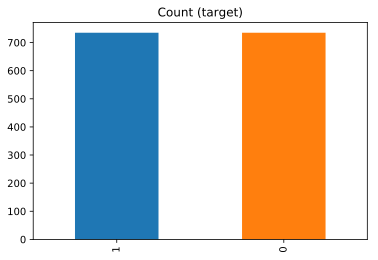

In [59]:
target_count = pd.Series(Y_smt).value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (target)');

In [60]:
X = X_smt
y = Y_smt
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.2, random_state=1)

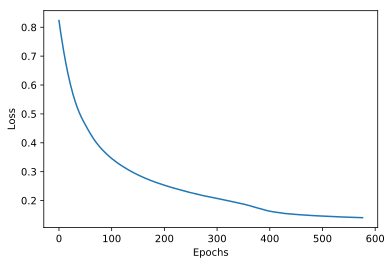

In [61]:
mlp = MLPClassifier(hidden_layer_sizes=(4),max_iter=1000, random_state=1)
mlp.fit(X_train,Y_train)
plt.plot(mlp.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig('LossvsEpoch.png')
plt.show()

In [62]:
predictions = mlp.predict(X_test)

In [63]:
collections.Counter(Y_test)

Counter({1: 150, 0: 144})

In [64]:
collections.Counter(Y_train)

Counter({1: 585, 0: 591})

In [65]:
def report(predictions, Y_test):
    print('Confusion Matrix:\n\n',confusion_matrix(Y_test,predictions))
    print("\n")
    print('Classification Report:\n\n',classification_report(Y_test,predictions,target_names=['0','1']))
    accuracy = accuracy_score(Y_test, predictions)
    print("Accuracy:%.2f%%" %(accuracy*100.0))
    print('Misclassified samples: %d' % (Y_test != predictions).sum())
    return
report(predictions, Y_test)

Confusion Matrix:

 [[135   9]
 [  0 150]]


Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.94      0.97       144
           1       0.94      1.00      0.97       150

   micro avg       0.97      0.97      0.97       294
   macro avg       0.97      0.97      0.97       294
weighted avg       0.97      0.97      0.97       294

Accuracy:96.94%
Misclassified samples: 9


In [66]:
#print(mlp.predict_proba(X_test))

Experimenting with Input layers, Iterations and Hidden layers

Case - Varying Number of Iterations


Number of Iterations = 10



/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


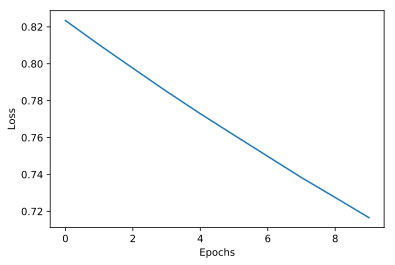

Confusion Matrix:

 [[ 15 129]
 [  0 150]]


Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.10      0.19       144
           1       0.54      1.00      0.70       150

   micro avg       0.56      0.56      0.56       294
   macro avg       0.77      0.55      0.44       294
weighted avg       0.76      0.56      0.45       294

Accuracy:56.12%
Misclassified samples: 129

Number of Iterations = 50



/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


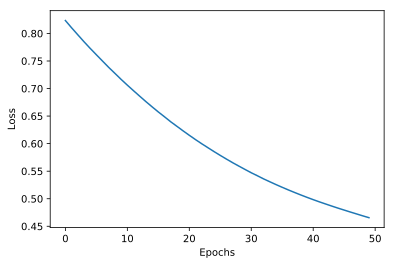

Confusion Matrix:

 [[ 84  60]
 [  0 150]]


Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.58      0.74       144
           1       0.71      1.00      0.83       150

   micro avg       0.80      0.80      0.80       294
   macro avg       0.86      0.79      0.79       294
weighted avg       0.85      0.80      0.79       294

Accuracy:79.59%
Misclassified samples: 60

Number of Iterations = 100



/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


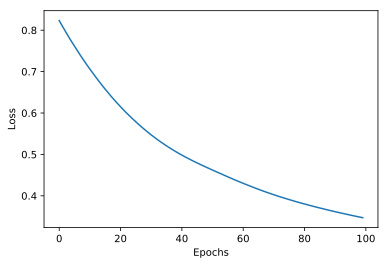

Confusion Matrix:

 [[104  40]
 [  0 150]]


Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.72      0.84       144
           1       0.79      1.00      0.88       150

   micro avg       0.86      0.86      0.86       294
   macro avg       0.89      0.86      0.86       294
weighted avg       0.89      0.86      0.86       294

Accuracy:86.39%
Misclassified samples: 40

Number of Iterations = 500



/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


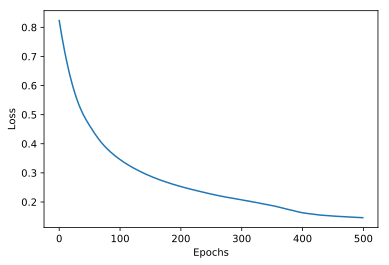

Confusion Matrix:

 [[134  10]
 [  0 150]]


Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.93      0.96       144
           1       0.94      1.00      0.97       150

   micro avg       0.97      0.97      0.97       294
   macro avg       0.97      0.97      0.97       294
weighted avg       0.97      0.97      0.97       294

Accuracy:96.60%
Misclassified samples: 10

Number of Iterations = 1000



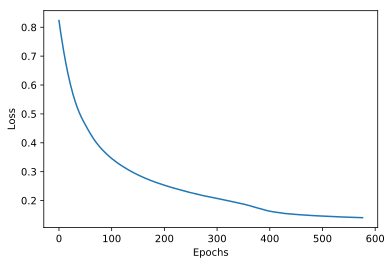

Confusion Matrix:

 [[135   9]
 [  0 150]]


Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.94      0.97       144
           1       0.94      1.00      0.97       150

   micro avg       0.97      0.97      0.97       294
   macro avg       0.97      0.97      0.97       294
weighted avg       0.97      0.97      0.97       294

Accuracy:96.94%
Misclassified samples: 9

Number of Iterations = 10000



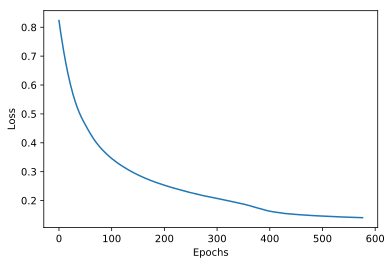

Confusion Matrix:

 [[135   9]
 [  0 150]]


Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.94      0.97       144
           1       0.94      1.00      0.97       150

   micro avg       0.97      0.97      0.97       294
   macro avg       0.97      0.97      0.97       294
weighted avg       0.97      0.97      0.97       294

Accuracy:96.94%
Misclassified samples: 9


In [67]:
M = [10, 50, 100, 500, 1000, 10000]
for i in M:
    print('\nNumber of Iterations =',i,end='\n\n')
    mlp = MLPClassifier(hidden_layer_sizes=(4),max_iter=i, random_state=1)
    mlp.fit(X_train,Y_train) 
    plt.plot(mlp.loss_curve_)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()
    predictions = mlp.predict(X_test)
    report(predictions, Y_test)

Case - Max Input Layers, 1 Hidden Layer, Hidden Layer sizes = 10, 100, 1000 and Iterations = Constant


Number of Hidden Layers = 1, Size of hidden layers = 10



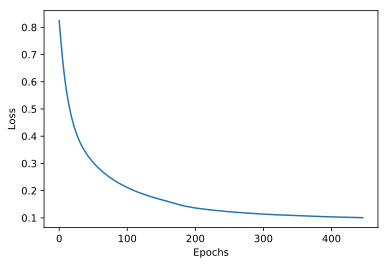

Confusion Matrix:

 [[136   8]
 [  2 148]]


Classification Report:

               precision    recall  f1-score   support

           0       0.99      0.94      0.96       144
           1       0.95      0.99      0.97       150

   micro avg       0.97      0.97      0.97       294
   macro avg       0.97      0.97      0.97       294
weighted avg       0.97      0.97      0.97       294

Accuracy:96.60%
Misclassified samples: 10

Number of Hidden Layers = 1, Size of hidden layers = 100



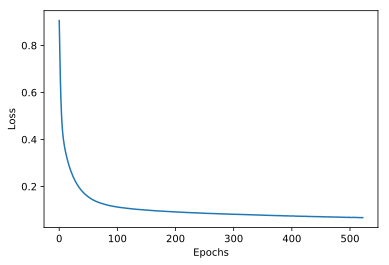

Confusion Matrix:

 [[138   6]
 [  2 148]]


Classification Report:

               precision    recall  f1-score   support

           0       0.99      0.96      0.97       144
           1       0.96      0.99      0.97       150

   micro avg       0.97      0.97      0.97       294
   macro avg       0.97      0.97      0.97       294
weighted avg       0.97      0.97      0.97       294

Accuracy:97.28%
Misclassified samples: 8

Number of Hidden Layers = 1, Size of hidden layers = 1000



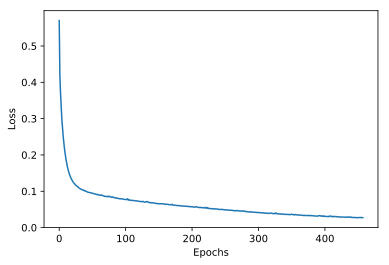

Confusion Matrix:

 [[138   6]
 [  0 150]]


Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.96      0.98       144
           1       0.96      1.00      0.98       150

   micro avg       0.98      0.98      0.98       294
   macro avg       0.98      0.98      0.98       294
weighted avg       0.98      0.98      0.98       294

Accuracy:97.96%
Misclassified samples: 6


In [68]:
L = [10, 100, 1000]
for i in L:
    print('\nNumber of Hidden Layers = 1, Size of hidden layers =',i,end='\n\n')
    mlp = MLPClassifier(hidden_layer_sizes=i,max_iter=1000, random_state=1)
    mlp.fit(X_train,Y_train) 
    plt.plot(mlp.loss_curve_)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()
    predictions = mlp.predict(X_test)
    report(predictions, Y_test)

Case - Multiple Hidden Layers


Number of Hidden Layers= 1 
Size of hidden layers = (10,)



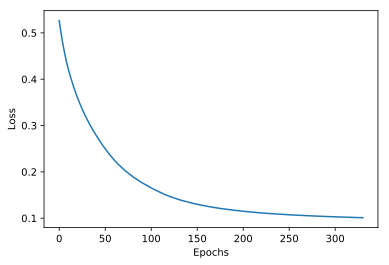

Confusion Matrix:

 [[137   7]
 [  0 150]]


Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.95      0.98       144
           1       0.96      1.00      0.98       150

   micro avg       0.98      0.98      0.98       294
   macro avg       0.98      0.98      0.98       294
weighted avg       0.98      0.98      0.98       294

Accuracy:97.62%
Misclassified samples: 7

Number of Hidden Layers= 2 
Size of hidden layers = (10, 10)



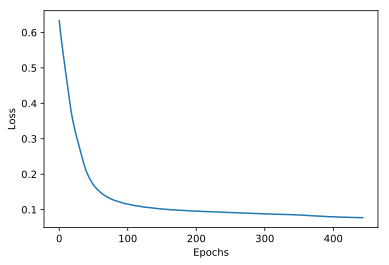

Confusion Matrix:

 [[138   6]
 [  0 150]]


Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.96      0.98       144
           1       0.96      1.00      0.98       150

   micro avg       0.98      0.98      0.98       294
   macro avg       0.98      0.98      0.98       294
weighted avg       0.98      0.98      0.98       294

Accuracy:97.96%
Misclassified samples: 6

Number of Hidden Layers= 3 
Size of hidden layers = (10, 10, 10)



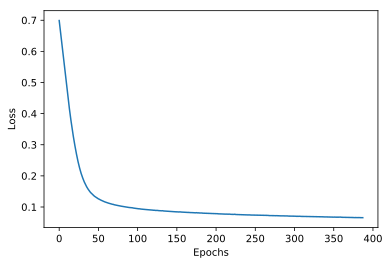

Confusion Matrix:

 [[138   6]
 [  0 150]]


Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.96      0.98       144
           1       0.96      1.00      0.98       150

   micro avg       0.98      0.98      0.98       294
   macro avg       0.98      0.98      0.98       294
weighted avg       0.98      0.98      0.98       294

Accuracy:97.96%
Misclassified samples: 6

Number of Hidden Layers= 4 
Size of hidden layers = (10, 10, 10, 10)



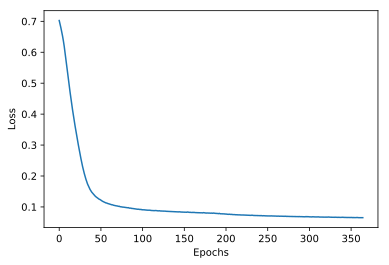

Confusion Matrix:

 [[138   6]
 [  0 150]]


Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.96      0.98       144
           1       0.96      1.00      0.98       150

   micro avg       0.98      0.98      0.98       294
   macro avg       0.98      0.98      0.98       294
weighted avg       0.98      0.98      0.98       294

Accuracy:97.96%
Misclassified samples: 6

Number of Hidden Layers= 5 
Size of hidden layers = (10, 10, 10, 10, 10)



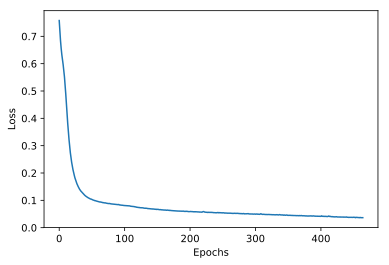

Confusion Matrix:

 [[140   4]
 [  0 150]]


Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.97      0.99       144
           1       0.97      1.00      0.99       150

   micro avg       0.99      0.99      0.99       294
   macro avg       0.99      0.99      0.99       294
weighted avg       0.99      0.99      0.99       294

Accuracy:98.64%
Misclassified samples: 4


In [69]:
L = [(10,),(10,10),(10,10,10),(10,10,10,10),(10,10,10,10,10)]
for i in L:
    print('\nNumber of Hidden Layers=',len(i),'\nSize of hidden layers =',i,end='\n\n')
    mlp = MLPClassifier(hidden_layer_sizes=i,max_iter=1000, random_state=2)
    mlp.fit(X_train,Y_train) 
    plt.plot(mlp.loss_curve_)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()
    predictions = mlp.predict(X_test)
    report(predictions, Y_test)

Case 2 (a) - Varying Input Layers, Keeping Hidden Layers and Hidden Layer size, Iterations constant.

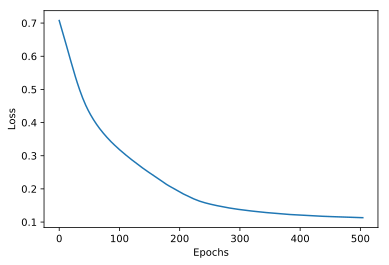

Confusion Matrix:

 [[135   9]
 [  1 149]]


Classification Report:

               precision    recall  f1-score   support

           0       0.99      0.94      0.96       144
           1       0.94      0.99      0.97       150

   micro avg       0.97      0.97      0.97       294
   macro avg       0.97      0.97      0.97       294
weighted avg       0.97      0.97      0.97       294

Accuracy:96.60%
Misclassified samples: 10


In [70]:
mlp = MLPClassifier(hidden_layer_sizes=(4),max_iter=1000)
mlp.fit(X_train,Y_train)

plt.plot(mlp.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

predictions = mlp.predict(X_test)

print('Confusion Matrix:\n\n', confusion_matrix(Y_test,predictions))
print("\n")
print('Classification Report:\n\n',classification_report(Y_test,predictions,target_names=['0','1']))
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:%.2f%%" %(accuracy*100.0))
print('Misclassified samples: %d' % (Y_test != predictions).sum())

Case 2(b) - 3 Input Layers, 2 Hidden Layers, 1000 Iterations

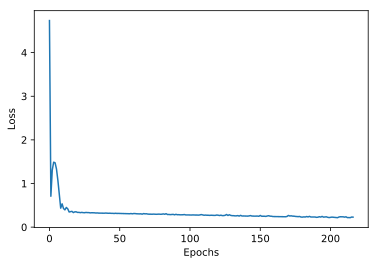

Confusion Matrix:

 [[290   1]
 [ 29   0]]


Classification Report:

               precision    recall  f1-score   support

           0       0.91      1.00      0.95       291
           1       0.00      0.00      0.00        29

   micro avg       0.91      0.91      0.91       320
   macro avg       0.45      0.50      0.48       320
weighted avg       0.83      0.91      0.86       320

Accuracy:90.62%
Misclassified samples: 30


In [71]:
y = pkmn['Legendary'].values
X = pkmn.values[:,1:4] #HP, Attack, Defense
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.4, random_state = 1)

mlp = MLPClassifier(hidden_layer_sizes=(100,100),max_iter=1000)
mlp.fit(X_train,Y_train)

plt.plot(mlp.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

predictions = mlp.predict(X_test)

print('Confusion Matrix:\n\n', confusion_matrix(Y_test,predictions))
print("\n")
print('Classification Report:\n\n',classification_report(Y_test,predictions,target_names=['0','1']))
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:%.2f%%" %(accuracy*100.0))
print('Misclassified samples: %d' % (Y_test != predictions).sum())

Case 2(c) - 5 Input Layers, 2 Hidden Layers, 1000 Iterations

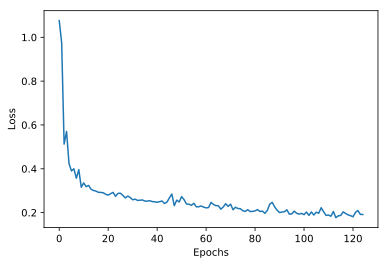

Confusion Matrix:

 [[288   3]
 [ 29   0]]


Classification Report:

               precision    recall  f1-score   support

           0       0.91      0.99      0.95       291
           1       0.00      0.00      0.00        29

   micro avg       0.90      0.90      0.90       320
   macro avg       0.45      0.49      0.47       320
weighted avg       0.83      0.90      0.86       320

Accuracy:90.00%
Misclassified samples: 32


In [72]:
y = pkmn['Legendary'].values
X = pkmn.values[:,3:7] #Attack, Defense, Sp.Atk, Sp. Def, Speed
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.4, random_state = 1)

mlp = MLPClassifier(hidden_layer_sizes=(100,100),max_iter=1000)
mlp.fit(X_train,Y_train)

plt.plot(mlp.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

predictions = mlp.predict(X_test)

print('Confusion Matrix:\n\n', confusion_matrix(Y_test,predictions))
print("\n")
print('Classification Report:\n\n',classification_report(Y_test,predictions,target_names=['0','1']))
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:%.2f%%" %(accuracy*100.0))
print('Misclassified samples: %d' % (Y_test != predictions).sum())

Case 3(a) - Max Input Layers, 4 Hidden Layers, 10 Iterations

Case 3(b) - Max Input Layers, 4 Hidden Layers, 100 Iterations

Case 3(c) - Max Input Layers, 4 Hidden Layers, 10000 Iterations

Generating an Unclassifiable Dataset

In [73]:
from sklearn.datasets import make_classification
from sklearn import model_selection
X, y = make_classification(n_samples=1000, 
    n_features=5, 
    n_redundant = 0,
    n_informative = 3,
    n_repeated = 0,
    n_classes = 3,
    n_clusters_per_class = 1,
    class_sep=0.75, 
    flip_y=0.1,
    random_state=1) 

In [74]:
#df = pd.DataFrame({'x1':X[:,0], 'x2':X[:,1], 'x3':X[:,2], 'x4':X[:,3], 'y':y})
#df

In [75]:
#sb.pairplot(df, height=3,vars=['x1','x2','x3','x4'],hue="y",palette="husl")